# Recommender Systems

The purpose of this notebook is to implement a recommendation engine end-to-end.
There are three main ways to approch a recommender system challenge: **Content Based Recommendations**, **Collaborative Filtering** and **Low Rank Factorization** or **Latent Factor Models**.

## Content Based Recommedations
This approach is called like that because we assume that we have available to us features for the different movies that capture what is the content of these movies (how romantic is, how much action is present in the movies, $\dots$).

Suppose the following scenario: you might have a set of movies and you may have a set of users, each who have rated some subset of the movies.
Suppose they have rated the movies 0 to 5 stars. <br>
What we would like to do is look at these users and predict how they would have rated other movies that they have not yet rated.

<img src="img/img4.png" alt="problem motivation" style="width: 700px;"/>

Here we take into account the following table of movie ratings. <br>
We want to predict the value to insert instead of the question marks. <br>
Let's suppose that fo each of the movies we have a set of feature for them. <br>
In this case we have two feature: $x_1$ that measures how romantic is a movie and $x_2$ that measures how much action is present in the movie.
So if we have a feature like these, then each movie can be represented with a feature vector. For example the feature vector for the movie one "Love at last" would be $x^{(1)} = [1 \space \space 0.9 \space \space 0]^T$ (the first value, which is 1, represent the interceptor therm).
Now, in order to make a prediction, we could treat predicting the ratings of each users as a separate **Linear Regression** problem. <br>
But to apply Linear Regression we need the $\theta^{(j)}$ parameters which represent in this case, for each user, how much they like romance and action movies. Let's suppose, for now, that some unspecified algorithm has learned these parameters $\theta^{(j)}$.

#### Problem formulation

$r(i, j) = 1$ if user $j$ has rated movie $i$ (0 otherwise) <br>
$y^{(i, j)} = $ rating by user $j$ on movie $i$ (if defined) <br>
$\theta^{(i)} = $ parameter vector for user $j$ <br>
$x^{(i)} = $ feature vector for movie $i$ <br>
$m^{(j)} = $ number of movies rated by user $j$ <br>
$n_{u} = $ number of users $j$ <br>

For user $j$, movie $i$, predict rating as: $(\theta^{(j)})^T(x^{(i)})$

To learn $\theta^{(j)}$ (parameter for user $j$):
$$ J(\theta^{(j)}) = \min_{\theta^{(j)}} \frac{1}{2} \sum_{i:r(i, j)=1} \Big((\theta^{(j)})^T x^{(i)} - y^{(i, j)} \Big)^2 + \frac{\lambda}{2} \sum_{k=1}^n (\theta^{(j)}_k)^2$$
Note that this is a Linear Regression cost function and note that we added the regularization therm (regularizing from $k$ = 1 up to $n$ and not up to $n + 1$ since the interceptor therm do not need to be regularized).

Now, of course, we do not want just to learn the parameter $\theta^{(j)}$ for a single user, but we want learn the parameter for all of our users. <br>
To learn $\theta^{(1)}, \theta^{(2)}, \dots , \theta^{(n_u)}$:
$$ J(\theta^{(1)}, \dots, \theta^{(n_u)}) = \min_{\theta^{(1)}, \dots, \theta^{(n_u)}} \frac{1}{2} \sum_{j=1}^{n_u} \sum_{i:r(i, j)=1} \Big((\theta^{(j)})^T x^{(i)} - y^{(i, j)} \Big)^2 + \frac{\lambda}{2} \sum_{j=1}^{n_u} \sum_{k=1}^n (\theta^{(j)}_k)^2$$

To find the best values of $\theta^{(1)}, \dots, \theta^{(n_u)}$, and namely minimize the cost function $J(\theta^{(1)}, \dots, \theta^{(n_u)})$ above, we can use **gradient descent**:

$\theta^{(j)}_k := \theta^{(j)}_k -\alpha \sum_{i:r(i, j)=1} \Big((\theta^{(j)})^T x^{(i)} - y^{(i, j)} \Big)x^{(i)}_k $ (for $k = 0$)

$\theta^{(j)}_k := \theta^{(j)}_k -\alpha \Big( \sum_{i:r(i, j)=1} \Big((\theta^{(j)})^T x^{(i)} - y^{(i, j)} \Big)x^{(i)}_k + \lambda \theta^{(j)}_k \Big)$ (for $k \neq 0 $)

## Collaborative Filtering

We use Collaborative Filtering when we have the following problem: suppose to have a dataset of movies along with the ratings of the users but we do not have the set of feature for each movie, so we do not know how romantic is a movie or how much action in present in a movie. <br>
We are in the situazion shown by the following table:

<img src="img/img2.png" alt="problem motivation" style="width: 700px;"/>

#### Assumption

Before proceeding with the solution, let's make a slightly different assumption. <br>
Let's say we've gone to each of our users, and each of our users has told has told us how much they like the romantic movies and how much they like action packed movies. So basically specifies to us of how much they like different types of movies. So Alice has associated a current of $\theta^{(1)}$, Bob $\theta^{(2)}$, Carol $\theta^{(3)}$ and Dave $\theta^{(4)}$.

<img src="img/img3.png" alt="problem motivation" style="width: 450px;"/>

If we can get these parameters $\theta^{(j)}$ from our users then it turns out that it becomes possible to try to infer what are the values of $x_1$ and $x_2$ for each movie.
Let's look at the example of the movie 1, "Love at last". <br>
All we know is that Alice and Bob loved this movie whereas Carol and Dave hated it. <br>
So what can we infer? <br>
Well, we know from the feature vectors $\theta^{(j)}$ that Alice and Bob love romantic movies because they told us that (in their feature vector has a 5 in the position of the feature $x_1$ which repesent the *romance* -- remembering that the first value in the feature vectors $\theta^{(j)}$ represent the interceptor therm $x_0$) and that they both rated "Love at last" with a 5. By contrast, Carol and Dave did not like romantic movies (they told us, as we can see from $\theta^{(3)}$ and $\theta^{(4)}$) and they both rated "Love at last" with a 0. <br>
So based on the fact that "Love at last" is loved by Alice and Bob that love romantic movies and hated by Carol and Dave that hate romantic movies, we might reasonably conclude that "Love at last" is probably a romantic movie and is probably it is not much an action movie.

So, what we are really asking is how the feature vector $x^{(1)}$ should be so that: <br>
$(\theta^{(1)})^T x^{(1)} \approx$ 5 <br>
$(\theta^{(2)})^T x^{(1)} \approx$ 5 <br>
$(\theta^{(3)})^T x^{(1)} \approx$ 0 <br>
$(\theta^{(4)})^T x^{(1)} \approx$ 0 <br>

#### Problem Formulation

$r(i, j) = 1$ if user $j$ has rated movie $i$ (0 otherwise) <br>
$y^{(i, j)} = $ rating by user $j$ on movie $i$ (if defined) <br>
$\theta^{(i)} = $ parameter vector for user $j$ <br>
$x^{(i)} = $ feature vector for movie $i$ <br>
$m^{(j)} = $ number of movies rated by user $j$ <br>
$n_{u} = $ number of users $j$ <br>
$n_{m} = $ number of movies $j$ <br>

For user $j$, movie $i$, predict rating as: $(\theta^{(j)})^T(x^{(i)})$

For one movie, given $\theta^{(1)}, \dots , \theta^{(n_u)}$, to learn $x^{(i)}:$
$$ J(x^{(i)}) = \min_{x^{(i)}} \frac{1}{2} \sum_{j:r(i, j)=1} \Big((\theta^{(j)})^T x^{(i)} - y^{(i, j)} \Big)^2 + \frac{\lambda}{2} \sum_{k=1}^n (x^{(i)}_k)^2$$

For all movies, given $\theta^{(1)}, \dots , \theta^{(n_u)}$, to learn $x^{(1)}, \dots, x^{(n_m)}:$
$$ J(x^{(1)}, \dots, x^{(n_m)}) =\min_{x^{(1)}, \dots, x^{(n_m)}} \frac{1}{2} \sum_{i=1}^{n_m} \sum_{j:r(i, j)=1} \Big((\theta^{(j)})^T x^{(i)} - y^{(i, j)} \Big)^2 + \frac{\lambda}{2} \sum_{i=1}^{n_m} \sum_{k=1}^n (x^{(i)}_k)^2$$

### Collaborative Filtering Algorithm

#### Non Efficient Algorithm

We can build a first version of our **Collaborative Filtering** with a combination of *Content Based Recommendations* approach and the approach adopted in our *assumption*.

With *Content Based Recommendation* approach we showed that given $x^{(1)}, \dots, x^{(n_m)}$ (feature for each movie) and movie rating, then we can estimate $\theta^{(1)}, \dots, \theta^{(n_u)}$. <br>
With the above *assumption* approach we showed that given $\theta^{(1)}, \dots, \theta^{(n_u)}$ (parameter for each user) and movie rating, then we can estimate $x^{(1)}, \dots, x^{(n_m)}$.

This is an **chicken and egg problem**, who comes first? <br>
What we can do is: <br>
$1-$ randomly guess some value of $\theta^{(1)}, \dots, \theta^{(n_u)}$. <br>
$2-$ then use the approach showed in our *assumption* section to estimate $x^{(1)}, \dots, x^{(n_m)}$. <br>
$3-$ then use *Content Based Recommendations* approach to estimate $\theta^{(1)}, \dots, \theta^{(n_u)}$. Jump to $2$. <br>

So that: Guess $ \theta \rightarrow x \rightarrow \theta \rightarrow x \rightarrow \theta \rightarrow x \rightarrow \theta \rightarrow x \rightarrow \dots$ <br>

This will actually cause the algorithm to converge to a reasonable set of feature for the movies and a reasonable set of parameters for the different users. <br>
This is possible only beacause each user rates multiple movies and each movie is rated by multiple users, so you can do this back and forth process to estimate $\theta$ and $x$.

#### Efficient Algorithm

It turns out that there is a more efficient algorithm that doesn not need to go back and forth between $x$ and $\theta$ but that can solve them simultaneously.

What we are going to do is basically take the cost function of the *Content Based Recommendation* approach $J(\theta^{(1)}, \dots, \theta^{(n_u)})$ and the cost function of our *assumption* $J(x^{(1)}, \dots, x^{(n_m)})$ and put them together obtaining the new following cost function which we need to minimize in order to find the best value of $x$ and $\theta$:

$$J(x^{(1)}, \cdots , x^{(n_m)}, \theta^{(1)}, \cdots , \theta^{(n_u)}) = \frac{1}{2} \sum_{(i,j):r(i,j)=1}\Big((\theta^{(j)})^T x^{(i)} - y^{(i,j)}\Big)^2 + \Big( \frac{\lambda}{2} \sum_{j=1}^{n_u} \sum_{k=1}^n (\theta_k^{(j)})^2 \Big) + \Big( \frac{\lambda}{2} \sum_{i=1}^{n_m} \sum_{k=1}^n (x_k^{(i)})^2 \Big)$$

$$ \min_{x^{(1)}, \cdots , x^{(n_m)}, \theta^{(1)}, \cdots , \theta^{(n_u)}} J(x^{(1)}, \cdots , x^{(n_m)}, \theta^{(1)}, \cdots , \theta^{(n_u)}) $$

#### Putting everything together

$1-$ Initialize $x^{(1)}, \cdots , x^{(n_m)}, \theta^{(1)}, \cdots , \theta^{(n_u)}$ to small random values. <br>
$2-$ Minimize $J(x^{(1)}, \cdots , x^{(n_m)}, \theta^{(1)}, \cdots , \theta^{(n_u)})$ using gradient descent (or an advance optimization algorithm). <br>
For every $j = 1, \dots , n_u, i = 1, \dots , n_m$: <br>

$x^{(i)}_k := x^{(i)}_k -\alpha \Big( \sum_{j:r(i, j)=1} \Big((\theta^{(j)})^T x^{(i)} - y^{(i, j)} \Big)\theta^{(j)}_k + \lambda x^{(i)}_k \Big)$

$\theta^{(j)}_k := \theta^{(j)}_k -\alpha \Big( \sum_{i:r(i, j)=1} \Big((\theta^{(j)})^T x^{(i)} - y^{(i, j)} \Big)x^{(i)}_k + \lambda \theta^{(j)}_k \Big)$

**Note**: in previous cost function $J(x^{(1)}, \cdots , x^{(n_m)}, \theta^{(1)}, \cdots , \theta^{(n_u)})$ we got rid of $x_0$ and $\theta_0$, so these update of gradient descent is done for all the value and there is no special case for $k = 0$.

$3-$ For a user $j$ with parameters $\theta$ and a movie $i$ with (learned) features $x$, predict a star rating of $(\theta^{(j)})^T (x^{(i)})$.

## Low Rank Matrix Factorization

*Low Rank Matrix Factorization* is essentialy an alternative way of writing out the predicitions of the *Collaborative Filtering* algorithm.

$Y$ matrix represents all the ratings by all the users $j$ to movie $i$. So $y^{(i, j)}$ represents the the rating given to movie $i$ by user $j$. <br>
Given this matrix $Y$ of all ratings, there is an alternatively way of writing out all the predicted ratings of the algorithm. In particular what user $j$ predicts on movie $i$ is given by the formula $(\theta^{(j)})^T (x^{(i)})$.

<img src="img/img5.png" alt="problem motivation" style="width: 600px;"/>

Now, given this matrix of predicted ratings, it turns out that there is a simpler of *vectorized* way of writing these out. <br>
In particular, if you take the $X$ matrix, which is thr matrix that contains all of the features for the different movies, and the $\theta$ matrix which contains the parameter vectors for each user, in order to have a vectorized way of computing the matrix of all the predictions, you can just do it by computing:
$$X \theta^T$$

### Mean normalization

Don't forget to normalize the matrix $Y$! <br>
Before training the model, you need to mean normalize the $Y$ matrix, namely you should subtract each row with the mean of that row **but** remember to consider only the values that has a rate (namely, has a 1 in the respective position of matrix $R$). <br>

After that, you can train the model with the normalized $Y$ matrix. <br>
After ran the model and computed the prediction matrix $X \theta^T$, in order to obtain the right ratings, you should add to the prediction matrix the mean (that you have previously calculated in the normalization phase) for each row.

## Find related movies

Finally we have gotten is the cool section, **how to recommend related movies to a user**?

You can recommend a movie to a user based on the predictions which our collaborative filtering algorithm has calculated on the movies which our user has not seen yet. <br>
To do that,  for a user $j$, it is enough to choose the best $n$ movies which the user $j$ has not seen yet that have the highest prediction from the predictions matrix $X \theta^T$.

Or, you could recommend movies similar between them. <br>
For first we need to run our algorithm in order to learn a feature vector $x^{(i)} \in \mathcal{R}^{n}$ for each movie (or product in general) $x^{(i)}$.
Then, to find which movie $k$ is related to movie $i$, we need a mechanism to measure *how similar* are two different movies. <br>
This mechanism is to compute the *distance* between the feature of the movies. If this distance is *small*, then this could be a pretty strong indication that the movie $k$ and $i$ are somehow "*similar*".

$$ small \space \lVert x^{(k)} - x^{(i)} \rVert $$

To find the 5 most similar movies to movie $k$, you just need to find the 5 movies $i$ with the smallest $\lVert x^{(k)} - x^{(i)} \rVert$ and this could give you a few different movies to recommend to your user.

## Exercise

Now we will implement the collaborative filtering learnig algorithm and apply it to a dataset of movie ratings. This dataset consists of ratings on a scale of 1 to 5. The dataset has $n_u = 943$ users and $n_m = 1682$ movies.

In [336]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize
import time
import random

### Functions

In [432]:
def computeCost(Theta, X, Y, R):
    i = (R[:, :] == 1).nonzero()[0]
    j = (R[:, :] == 1).nonzero()[1]
    J = 0
    for k in range(i.size):
        J += 1/2*(np.dot(Theta[j[k], :], X[i[k]].T) - Y[i[k], j[k]])**2
    return J
                                                  
def gradientDescent(Theta, X, Y, R, alpha, iterations):
    J_history = np.zeros((iterations, 1))
    for k in range(iterations): 
        X = X - alpha*(np.dot((R*np.dot(Theta, X.T).T) - Y, Theta))
        Theta = Theta - alpha*(np.dot(((R*np.dot(Theta, X.T).T) - Y).T, X))
        J_history[k] = computeCost(Theta, X, Y, R)
    return X, Theta, J_history


def computeCostReg(Theta, X, Y, R, lamda):
    return (1/2)*(sum(sum((R*np.dot(Theta, X.T).T - Y)**2))) + (lamda/2 *sum(sum((Theta)**2))) + (lamda/2 *sum(sum((X)**2)))


def gradientDescentReg(Theta, X, Y, R, alpha, iterations, lamda):
    J_history = np.zeros((iterations, 1))
    for k in range(iterations): 
        X = X - alpha*(np.dot((R*np.dot(Theta, X.T).T) - Y, Theta)) + (lamda*X)
        Theta = Theta - alpha*(np.dot(((R*np.dot(Theta, X.T).T) - Y).T, X)) + (lamda*Theta)
        J_history[k] = computeCostReg(Theta, X, Y, R, lamda)
    return X, Theta, J_history


def cofiCostFunction(weights, num_movies, num_features, num_users, R, Y, lamda):
    #X = weights[0:num_movies, 0:num_features]
    #Theta = weights[num_movies:, 0:num_features]
    X = weights[0:num_movies * (num_features)].reshape(num_movies, num_features) #contains n features per movie
    Theta = weights[num_movies * (num_features):].reshape(num_users, num_features) #contains n features per user 
    J = (1/2)*(sum(sum((R*np.dot(Theta, X.T).T - Y)**2))) + (lamda/2 *sum(sum((Theta)**2))) + (lamda/2 *sum(sum((X)**2)))
    X_grad = np.dot((R*np.dot(Theta, X.T).T) - Y, Theta) + (lamda*X)
    Theta_grad = np.dot(((R*np.dot(Theta, X.T).T) - Y).T, X) + (lamda*Theta)
    return J, np.vstack((X_grad, Theta_grad))


def loadMovieList(filename):
    with open(filename, encoding="ISO-8859-1") as f:
        content = f.readlines()
        # you may also want to remove whitespace characters like `\n` at the end of each line
        content = [x.strip() for x in content]
    return content

def normalizeRatings(Y, R):
    m = Y.shape[0]
    Ymean = np.zeros((m, 1))
    Ynorm = np.zeros((m, Y.shape[1]))
    for index in range(m):
        Ymean[index] = np.mean(Y[index, (R[index, :] == 1).nonzero()])
        Ynorm[index, (R[index, :] == 1).nonzero()] = Y[index, (R[index, :] == 1).nonzero()] - Ymean[index]
    return Ynorm, Ymean

def normalizeRatings2(Y, R):
    m = Y.shape[0]
    n = Y.shape[1]
    Ymean = np.zeros((m, 1))
    Ynorm = np.zeros((m, n))
    for i in range(m):
        countN = 0
        for j in range(n):
            if R[i, j] == 1:
                Ymean[i] = Ymean[i] + Y[i, j]
                countN += 1
        Ymean[i] = Ymean[i] / countN
        
    for i2 in range(m):
        for j2 in range(n):
            if R[i2, j2] == 1:
                Ynorm[i2, j2] = Y[i2, j2] - Ymean[i2]
    return Ynorm, Ymean

### Running the model on pre-trained weights
This is just to check that the cost function works as expected. The printed value is a benchmark calculated on smaller matrices and offered during Andrew Ng's course, and my result perfectly matches his. So, good news, we can go ahead.

In [201]:
data = sio.loadmat('ex8_movies.mat')
data2 = sio.loadmat('ex8_movieParams.mat')
Y = data['Y']
R = data['R']
X = data2['X']
Theta = data2['Theta']

num_users = 4
num_movies = 5
num_features = 3
X = X[0:num_movies, 0:num_features]
Theta = Theta[0:num_users, 0:num_features]
Y = Y[0:num_movies, 0:num_users]
R = R[0:num_movies, 0:num_users]

#weights = np.vstack((X, Theta))
weights = np.vstack((X.reshape(X.size, 1), Theta.reshape(Theta.size, 1)))
lamda = 1.5
cost, grad = cofiCostFunction(weights, num_movies, num_features, num_users, R, Y, lamda)
cost

31.344056244274213

## Implementing the Low Rank Factorization Algorithm
Here we are going to load the whole dataset ($Y$ and $R$) and "visualizing" the  $movies$ x $users$  (1682  ×  943) $Y$ matrix. <br>
*imshow* nicely allows us to highlight the 1 to 5 ratings and the missing entries. As you can see the matrix is (as expected) pretty sparse.

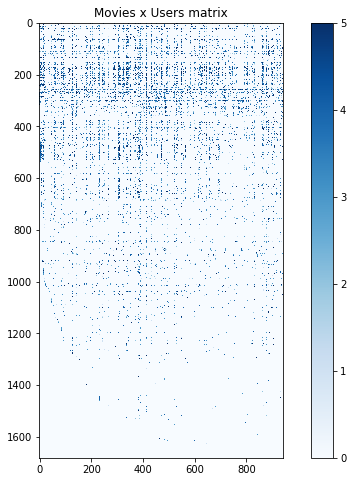

In [209]:
data = scipy.io.loadmat('ex8_movies.mat')
R = data['R']
Y = data['Y']

plt.figure(figsize=(10, 8))
plt.imshow(Y, cmap='Blues')
plt.colorbar()
plt.title('Movies x Users matrix')
plt.show()

### New user ratings
Before training the collaborative filtering model, we will first add ratings that correspond to a new user.
Now we will put our own ratings on the movies within the dataset.

In [570]:
movieList = loadMovieList('movie_ids.txt')

# initialize my ratings
my_ratings = np.zeros((Y.shape[0], 1))

# suppose we liked the first movie of our dataset (Toy Story (1995)), then we put for example 4/5 rate at the first
# movie
my_ratings[0] = 4

# suppose we did not like the 98th movie (Silence of the Lambs (1991)), then we set a rate of 2
my_ratings[97] = 2

# here we select other movies and rate them
my_ratings[2] = 1
my_ratings[20] = 2
my_ratings[40] = 3
my_ratings[60] = 4
my_ratings[80] = 5
my_ratings[100] = 5
my_ratings[120] = 4
my_ratings[140] = 3
my_ratings[160] = 2
my_ratings[180] = 1
my_ratings[200] = 2
my_ratings[220] = 3
my_ratings[240] = 4
my_ratings[260] = 5
my_ratings[280] = 5
my_ratings[300] = 4

# print our ratings
for index in range(my_ratings.size):
    if my_ratings[index] > 0:
        print(movieList[index], ", rate: ", my_ratings[index][0])

1 Toy Story (1995) , rate:  4.0
3 Four Rooms (1995) , rate:  1.0
21 Muppet Treasure Island (1996) , rate:  2.0
41 Billy Madison (1995) , rate:  3.0
61 Three Colors: White (1994) , rate:  4.0
81 Hudsucker Proxy, The (1994) , rate:  5.0
98 Silence of the Lambs, The (1991) , rate:  2.0
101 Heavy Metal (1981) , rate:  5.0
121 Independence Day (ID4) (1996) , rate:  4.0
141 20,000 Leagues Under the Sea (1954) , rate:  3.0
161 Top Gun (1986) , rate:  2.0
181 Return of the Jedi (1983) , rate:  1.0
201 Evil Dead II (1987) , rate:  2.0
221 Breaking the Waves (1996) , rate:  3.0
241 Last of the Mohicans, The (1992) , rate:  4.0
261 Air Bud (1997) , rate:  5.0
281 River Wild, The (1994) , rate:  5.0
301 In & Out (1997) , rate:  4.0


Now we have to adjust $Y$ matrix and $R$ matrix since we added a new user and then we will proceed by trining the collaborative filtering model.

In [571]:
data = sio.loadmat('ex8_movies.mat')
Y = data['Y']
R = data['R']

Y = np.c_[Y, my_ratings]
Rsingle = np.where(Y[:, Y.shape[1] - 1] > 0, 1 , 0).reshape(-1, 1)
R = np.c_[R, Rsingle]

In [572]:
# normalize ratings
Ynorm, Ymean = normalizeRatings(Y, R)

# useful values
num_users = Y.shape[1]
num_movies = Y.shape[0]
num_features = 100

# initialize X and Theta
X = np.random.rand(num_movies, num_features)
Theta = np.random.rand(num_users, num_features)
weights = np.vstack((X.reshape(X.size, 1), Theta.reshape(Theta.size, 1)))

# train the model using Ynorm
start = time.time()

opt_results = scipy.optimize.minimize(fun=cofiCostFunction, x0=weights.squeeze(), 
                                       args=(num_movies, num_features, num_users, R, Ynorm, lamda), 
                                       jac=True, method='TNC', options={'disp':True})
end = time.time()
total = end-start
print("Training executed in", round(total/60, 2), "minutes")

Training executed in 4.92 minutes


In [573]:
X = opt_results.x[0:num_movies * (num_features)].reshape(num_movies, num_features) 
Theta = opt_results.x[num_movies * (num_features):].reshape(num_users, num_features)

In [576]:
predictions = np.dot(X, Theta.T)
predictions = predictions + Ymean

# get prediction for user num_users - 1 (me)
my_predictions = predictions[:, num_users - 1]

### 20 film I have not seen yet and I cannot miss!

In [577]:
# consider n = 20
n = 20
indices_best_movies = np.argsort(my_predictions)[::-1][:num_movies]

for i in range(n):
    if R[indices_best_movies[i], num_users - 1] == 0:
        print("Movie: ", movieList[indices_best_movies[i]], "predicted rate: ", round(my_predictions[indices_best_movies[i]]))


Movie:  1189 Prefontaine (1997) predicted rate:  5.0
Movie:  1293 Star Kid (1997) predicted rate:  5.0
Movie:  1122 They Made Me a Criminal (1939) predicted rate:  5.0
Movie:  1467 Saint of Fort Washington, The (1993) predicted rate:  5.0
Movie:  1599 Someone Else's America (1995) predicted rate:  5.0
Movie:  1653 Entertaining Angels: The Dorothy Day Story (1996) predicted rate:  5.0
Movie:  1500 Santa with Muscles (1996) predicted rate:  5.0
Movie:  814 Great Day in Harlem, A (1994) predicted rate:  5.0
Movie:  1201 Marlene Dietrich: Shadow and Light (1996) predicted rate:  5.0
Movie:  1536 Aiqing wansui (1994) predicted rate:  5.0
Movie:  190 Henry V (1989) predicted rate:  5.0
Movie:  64 Shawshank Redemption, The (1994) predicted rate:  5.0
Movie:  659 Arsenic and Old Lace (1944) predicted rate:  5.0
Movie:  318 Schindler's List (1993) predicted rate:  5.0
Movie:  182 GoodFellas (1990) predicted rate:  5.0
Movie:  209 This Is Spinal Tap (1984) predicted rate:  5.0
Movie:  134 Citize

### 20 recommended movies similar to Toy Story (1995)

In [580]:
# consider n = 20
n = 20

# take into account movie 1  Toy Story (1995)
movie1 = X[0, :]

# compute distance
Xdistance = np.zeros((X.shape[0], 1))
for i in range(X.shape[0]):
    Xdistance[i] = np.linalg.norm(movie1 - X[i, :])

# get prediction for user num_users - 1 (me)
my_predictions = predictions[:, num_users - 1]

# get index of the movies most similar to Toy Story (1995) in ascending order
indices_similar_movies = sorted(range(len(Xdistance)),key=Xdistance.__getitem__)

# print first n most similar movies to Toy Story (1995)
for i in range(n):
    if R[indices_similar_movies[i], num_users - 1] == 0:
        print("Movie: ", movieList[indices_similar_movies[i]], "predicted rate: ", round(my_predictions[indices_similar_movies[i]]))


Movie:  426 Transformers: The Movie, The (1986) predicted rate:  3.0
Movie:  1558 Aparajito (1956) predicted rate:  4.0
Movie:  608 Spellbound (1945) predicted rate:  4.0
Movie:  936 Brassed Off (1996) predicted rate:  4.0
Movie:  115 Haunted World of Edward D. Wood Jr., The (1995) predicted rate:  4.0
Movie:  954 Unzipped (1995) predicted rate:  4.0
Movie:  1251 A Chef in Love (1996) predicted rate:  4.0
Movie:  1264 Nothing to Lose (1994) predicted rate:  3.0
Movie:  1199 Cemetery Man (Dellamorte Dellamore) (1994) predicted rate:  3.0
Movie:  539 Mouse Hunt (1997) predicted rate:  3.0
Movie:  870 Touch (1997) predicted rate:  3.0
Movie:  1117 Surviving Picasso (1996) predicted rate:  3.0
Movie:  1229 Poison Ivy II (1995) predicted rate:  2.0
Movie:  1518 Losing Isaiah (1995) predicted rate:  3.0
Movie:  1612 Leading Man, The (1996) predicted rate:  3.0
Movie:  1279 Wild America (1997) predicted rate:  3.0
Movie:  623 Angels in the Outfield (1994) predicted rate:  3.0
Movie:  923 Rais